In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_66246_Z')

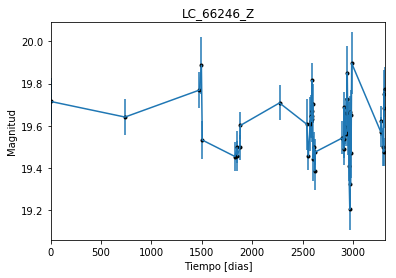

In [2]:
data = np.genfromtxt('LC_66246_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_66246_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

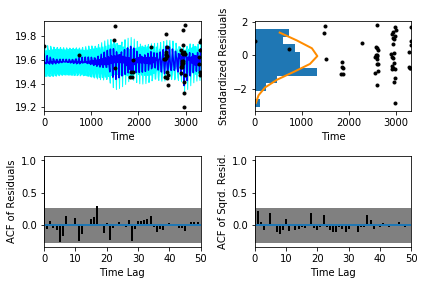

In [5]:
sample.assess_fit()

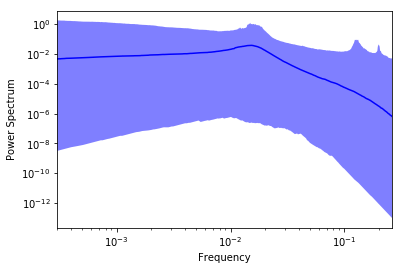

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_66246_Z')

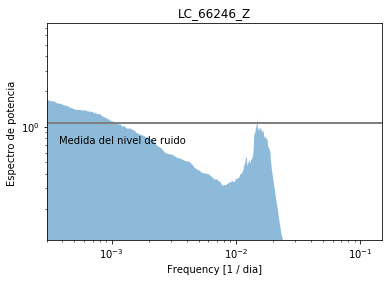

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_66246_Z')

Text(0.5,1,'Prediccion , valor esperado LC_66246_Z')

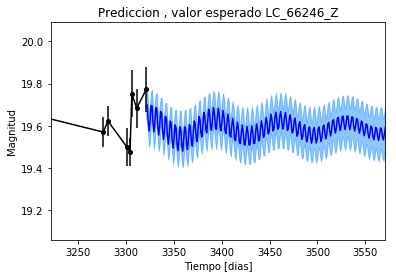

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_66246_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_66246_Z')

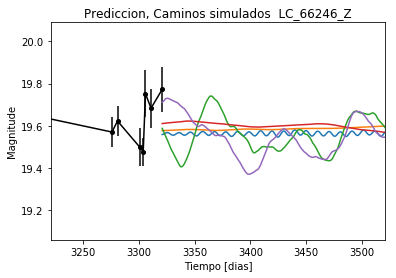

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_66246_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_66246_Z')

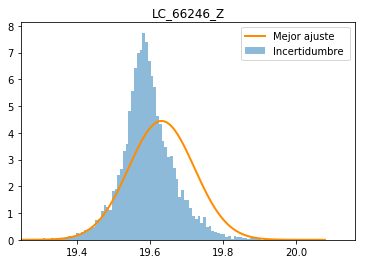

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_66246_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_66246_Z')

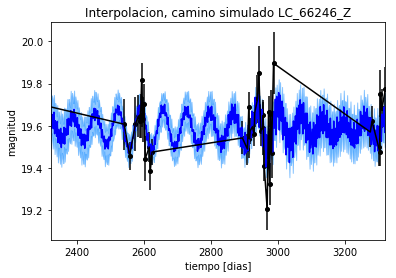

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66246_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_66246_Z')

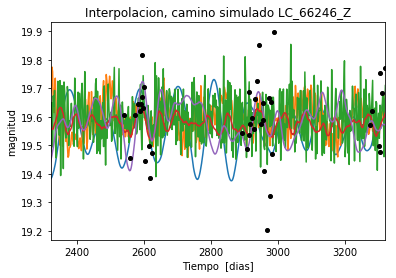

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_66246_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 339.959504585
Median: 0.0055330771006
Standard deviation: 0.0829911337832
68% credibility interval: [ 0.00071936  0.06165165]
95% credibility interval: [ 0.00034771  0.3408137 ]
99% credibility interval: [  3.13878520e-04   4.55904924e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 370.842498433
Median: 0.00479168964555
Standard deviation: 0.0692571008712
68% credibility interval: [ 0.00068693  0.04629307]
95% credibility interval: [ 0.00034551  0.25387788]
99% credibility interval: [  3.13878520e-04   4.51671968e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1056.39695851
Median: 0.00474220415124
Standard deviatio

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 272.598227483
Median: 54.6850243077
Standard deviation: 2.10381929222
68% credibility interval: [ 52.72064929  56.63731324]
95% credibility interval: [ 50.41395265  58.76907083]
99% credibility interval: [ 48.30300382  60.85007217]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 404.029087464
Median: 0.261177392494
Standard deviation: 1.23084528013
68% credibility interval: [ 0.04156659  1.87094992]
95% credibility interval: [ 0.0122828   4.35604001]
99% credibility interval: [ 0.00969972  6.52433718]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 511.574285287
Median: 0.839896175287
Standard deviation: 3.52178953174
68% credibility interval: [ 0.06279474  5.87037069]
95% credibility interval: [  9.90836461e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6693.78684015
Median: 0.378225311075
Standard deviation: 9.52704006776e+43
68% credibility interval: [  3.50052755e-38   2.82957008e+13]
95% credibility interval: [  3.21251570e-74   9.78403067e+35]
99% credibility interval: [  4.57451287e-85   3.81292383e+44]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2742.34929264
Median: 19.578613224
Standard deviation: 0.0214352600687
68% credibility interval: [ 19.56161333  19.59759969]
95% credibility interval: [ 19.54280103  19.62493661]
99% credibility interval: [ 19.52613992  19.66190635]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 375.504872397
Median: 0.129343849576
Standard deviation: 0.143089875677
68% credibility interval: [ 0.01693465  0.33662056]
95% credibility interval: [ 0.          0.47985322]
99% credibility interval: [ 0.          0.51770188]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 375.504872397
Median: 0.129343849576
Standard deviation: 0.143089875677
68% credibility interval: [ 0.01693465  0.33662056]
95% credibility interval: [ 0.          0.47985322]
99% credibility interval: [ 0.          0.51770188]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 213.448260738
Median: 0.0108069253495
Standard deviation: 0.045273833178

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 272.598227483
Median: 54.6850243077
Standard deviation: 2.10381929222
68% credibility interval: [ 52.72064929  56.63731324]
95% credibility interval: [ 50.41395265  58.76907083]
99% credibility interval: [ 48.30300382  60.85007217]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 857.791132808
Median: 0.00421117256215
Standard deviation: 0.00530777269732
68% credibility interval: [ 0.00117427  0.00991761]
95% credibility interval: [  4.57824525e-05   1.87270488e-02]
99% credibility interval: [  1.79641277e-06   2.92189234e-02]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 582.29518648
Median: 1.30423757635
Standard deviation: 0.242757512948
68% credibility interval: [ 1.0632241   1.56016596]
95% credibility interval: [ 0.87052381  1.82790438]
99% credibility interval: [ 0.77609724  1.94651632]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 576.791415158
Median: 3.37801156981e-05
Standard deviation: 0.265719802902
68% credibility interval: [  2.83782618e-16   7.56369893e-03]
95% credibility interval: [  1.59383358e-38   2.06773901e-01]
99% credibility interval: [  7.16708425e-47   9.43680438e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 339.959504585
Median: (-0.034765348742-0.413841157256j)
Standard deviation: 1.03933534973
68% credibility interval: [-0.38736873-0.26373888j -0.00451985-1.44109522j]
95% credibility interval: [-2.14139564-2.17788449j -0.00218471-0.57881862j]
99% credibility interval: [ -2.86453512e+00-0.9213693j   -1.97215691e-03-0.78895009j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 370.842498433
Median: (-0.0301070739775+3.01224412931j)
Standard deviation: 0.998833969249
68% credibility interval: [-0.29086795+3.09191415j -0.00431612+0.9541311j ]
95% credibility interval: [-1.59516176+0.98216636j -0.00217091+0.00256179j]
99% credibility interval: [ -2.83793867e+00+0.55596164j  -1.97215691e-03+0.78895009j]
Posterior summary for p